In [1]:
from google.colab import files
files.upload()

Saving car_age_price.csv to car_age_price.csv


{'car_age_price.csv': b'Year,Price\r2018,465000\r2019,755000\r2019,700000\r2018,465000\r2018,465000\r2015,350000\r2016,425000\r2017,575000\r2017,509999\r2017,575000\r2019,500000\r2018,500000\r2017,500000\r2019,600000\r2017,475000\r2017,500000\r2017,500000\r2017,550000\r2019,500000\r2017,500000\r2018,500000\r2019,500000\r2015,434999\r2017,550000\r2017,550000\r2017,550000\r2017,550000\r2017,550000\r2017,550000\r2017,550000\r2019,650000\r2017,550000\r2017,550000\r2017,550000\r2017,450000\r2017,550000\r2017,550000\r2017,486000\r2018,475000\r2020,545000\r2019,525000\r2019,600000\r2018,550000\r2019,550000\r2019,550000\r2018,450000\r2019,500000\r2018,450000\r2016,396000\r2018,600000\r2013,325000\r2018,550000\r2013,345000\r2013,345000\r2017,525000\r2017,550000\r2014,341000\r2017,550000\r2014,450000\r2016,550000\r2015,490000\r2017,540000\r2017,540000\r2017,595000\r2015,490000\r2017,495000\r2017,525000\r2015,400000\r2015,465000\r2015,300000\r2015,450000\r2017,490000\r2015,300000\r2013,320000\r20

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('car_age_price.csv')

In [4]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [5]:
data.isnull().sum()

Year     0
Price    0
dtype: int64

<Axes: >

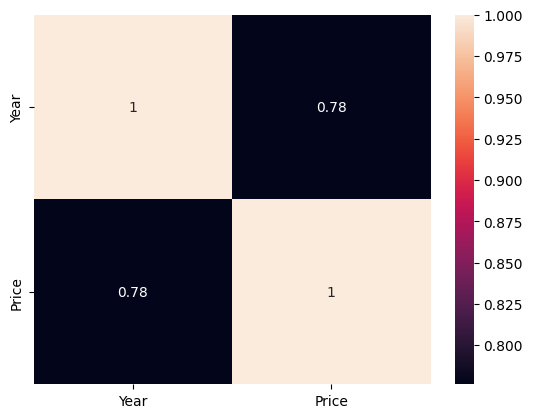

In [6]:
corrmatrix=data.corr()
sns.heatmap(corrmatrix,annot=True)

In [7]:
data.columns

Index(['Year', 'Price'], dtype='object')

In [8]:
data.dtypes

Year     int64
Price    int64
dtype: object

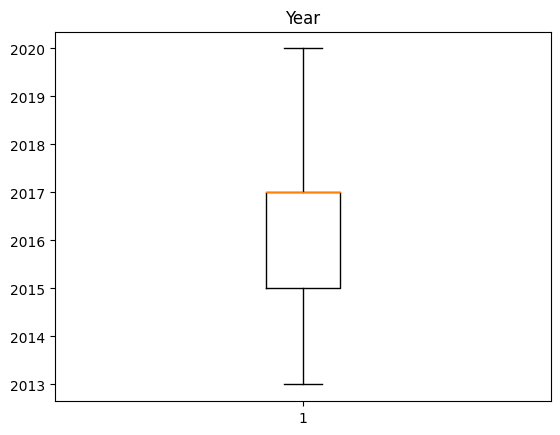

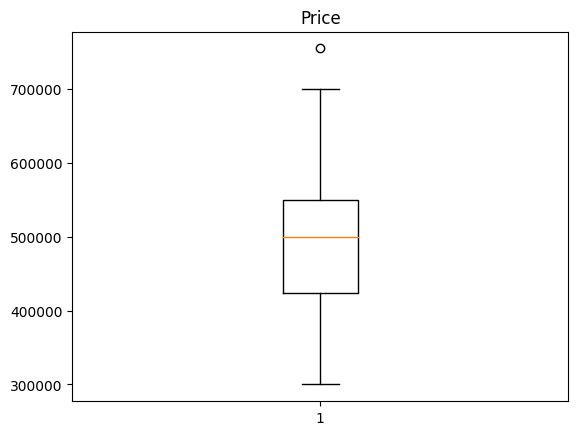

In [9]:
num_col=['Year', 'Price']
for i in num_col:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [10]:
Q1=np.percentile(data['Price'],25,interpolation='midpoint')
Q2=np.percentile(data['Price'],50,interpolation='midpoint')
Q3=np.percentile(data['Price'],75,interpolation='midpoint')

<ipython-input-10-c6f49047b0dd>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['Price'],25,interpolation='midpoint')
<ipython-input-10-c6f49047b0dd>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['Price'],50,interpolation='midpoint')
<ipython-input-10-c6f49047b0dd>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3=np.percentile(data[

In [11]:
data['Price'].median()

500000.0

In [12]:
IQR=Q3-Q1

In [13]:
up_lim=Q3+1.5*IQR
low_lim=Q1-1.5*IQR

In [14]:
outlier=[]
for x in data['Price']:
    if (x<low_lim) or (x>up_lim):
        outlier.append(x)

In [15]:
ind1=data['Price']>up_lim
ind=data.loc[ind1].index.tolist()
print(ind)

[1]


In [16]:
data.drop([1],inplace=True)

In [34]:
x=data['Year'].values.reshape(-1,1)
y=data['Price'].values

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lr=LinearRegression()

In [39]:
model=lr.fit(x_train,y_train)

In [40]:
y_pred=model.predict(x_test)

In [41]:
from sklearn.metrics import mean_squared_error,r2_score

In [42]:
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

2718820563.0700393
0.6727697922780109


In [45]:
a = model.predict([[2022]])

In [46]:
a

array([698523.05182213])